<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-2-Tree-Ensembles/blob/master/Copy_of_DS_Sprint_Challenge_7_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll use information about the shot and the game to predict whether the shot was made. This is hard to predict! Try for an accuracy score in the high 50's or low 60's. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [0]:
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url, parse_dates=['game_date']).set_index('game_date')
assert df.shape == (13958, 19)
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0


This Sprint Challenge has two parts. To demonstrate mastery on each part, do all the required, numbered instructions. To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Prepare to model

### Required

1. **Do train/validate/test split.** Use the 2009-10 season through 2016-17 season to train, the 2017-18 season to validate, and the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your train set has 11081 observations, your validation set has 1168 observations, and your test set has 1709 observations.
2. **Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is the baseline accuracy for the validation set, if you guessed the majority class for every prediction?
3. **Use Ordinal Encoding _or_ One-Hot Encoding,** for the categorical features you select.
4. **Train a Random Forest _or_ Logistic Regression** with the features you select.

### Stretch goals
Engineer at least 4 of these 5 features:

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?
    

## Part 2. Evaluate models

### Required
1. Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.)
2. Get your model's **test accuracy.** (One time, at the end.)
3. Get and plot your Random Forest's **feature importances** _or_ your Logistic Regression's **coefficients.**
4. Imagine this is the confusion matrix for a binary classification model. **Calculate accuracy, precision, and recall for this confusion matrix:**

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>


### Stretch goals
- Calculate F1 score for the provided, imaginary confusion matrix.
- Plot a real confusion matrix for your basketball model, with row and column labels.
- Print the classification report for your model.

In [0]:
#Part 1
#train/validate 
#one hot encoding
#train model
#split data at June 2017 for test
#split data  at 2009 - June 2017 for train
#validate is to June 2018
#test would be to June 2019

In [0]:
#installs
!pip install category_encoders
!pip install pandas_profiling

     |████████████████████████████████| 92kB 5.7MB/s 


In [0]:
#imports
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score 

In [0]:
#train, val, test
train = df.loc['2009-07-01' : '2017-6-30']
val = df.loc['2017-07-07' : '2018-6-30']
test = df.loc['2018-6-30' : '2019-6-5']

train.shape, val.shape, test.shape

((11081, 23), (1168, 23), (1709, 23))

In [0]:
#determine majority class
y_val = val['shot_made_flag']
y_val.value_counts(normalize=True)

0    0.516267
1    0.483733
Name: shot_made_flag, dtype: float64

In [0]:
#majority class for every prediction
majority = y_val.mode()[0]
y_pred = [majority]*len(y_val)

In [0]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [0]:
#validation baseline using majority as prediction
accuracy_score(y_val, y_pred)

0.5162671232876712

In [95]:
#Part 1: One Hot Encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(train[['action_type', 'shot_type']])
encoded[:5]

,action_type_Jump Shot,action_type_Step Back Jump shot,action_type_Pullup Jump shot,action_type_Layup Shot,action_type_Jump Bank Shot,action_type_Driving Layup Shot,action_type_Reverse Layup Shot,action_type_Running Jump Shot,action_type_Floating Jump shot,action_type_Driving Finger Roll Layup Shot,action_type_Running Hook Shot,action_type_Driving Reverse Layup Shot,action_type_Turnaround Jump Shot,action_type_Fadeaway Jump Shot,action_type_Running Layup Shot,action_type_Running Bank shot,action_type_Jump Hook Shot,action_type_Turnaround Bank shot,action_type_Driving Bank Hook Shot,action_type_Running Reverse Layup Shot,action_type_Tip Shot,action_type_Fadeaway Bank shot,action_type_Hook Shot,action_type_Pullup Bank shot,action_type_Finger Roll Layup Shot,action_type_Slam Dunk Shot,action_type_Turnaround Fadeaway shot,action_type_Driving Dunk Shot,action_type_Driving Jump shot,action_type_Hook Bank Shot,action_type_Driving Bank shot,action_type_Running Bank Hook Shot,action_type_Putback Layup Shot,action_type_Dunk Shot,action_type_Driving Hook Shot,action_type_Turnaround Bank Hook Shot,action_type_Running Finger Roll Layup Shot,action_type_Running Slam Dunk Shot,action_type_Driving Slam Dunk Shot,action_type_Turnaround Hook Shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Running Pull-Up Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Floating Bank Jump Shot,action_type_Alley Oop Layup shot,action_type_Turnaround Fadeaway Bank Jump Shot,action_type_Running Dunk Shot,action_type_Tip Layup Shot,action_type_Step Back Bank Jump Shot,action_type_No Shot,shot_type_3PT Field Goal,shot_type_2PT Field Goal
game_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-10-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2009-10-28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2009-10-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2009-10-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2009-10-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipeline = make_pipeline(
    ce.OneHotEncoder (use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

#target
target = 'shot_made_flag'

#features
features = ['action_type', 'shot_type']

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

x_val = val[features]
y_val = val[target]

#fit on train, score on val, predict on test
pipeline.fit(x_train, y_train)
#Validation Accuracy Score
print('Validation Accuracy', pipeline.score(x_val, y_val))

Validation Accuracy 0.6113013698630136


In [0]:
print('Test Accuracy', pipeline.score(x_test, y_test))

Test Accuracy 0.6173200702165009


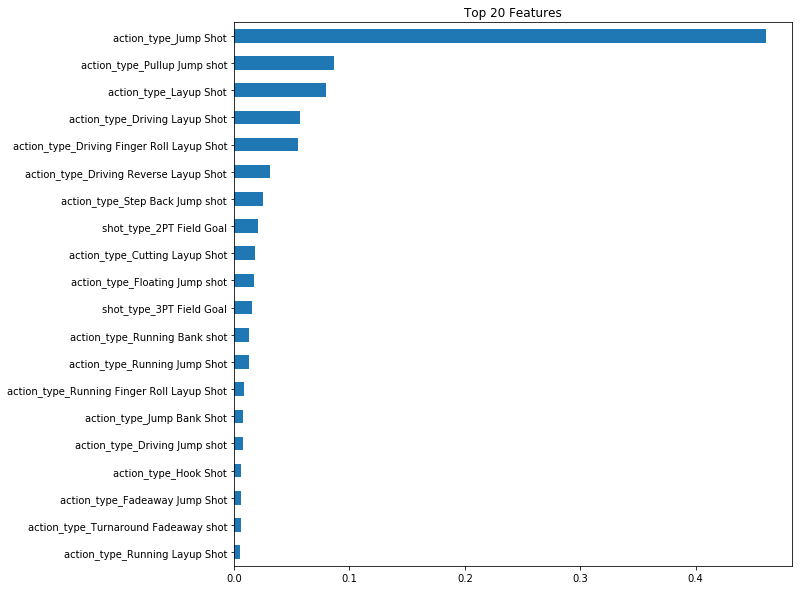

In [94]:
#feature importance
feature_names = pipeline.named_steps['onehotencoder'].transform(x_val).columns
importances = pipeline.named_steps['randomforestclassifier'].feature_importances_
fi_ser = pd.Series(importances, feature_names)
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
fi_ser.sort_values()[-n:].plot.barh();

4. Imagine this is the confusion matrix for a binary classification model. **Calculate accuracy, precision, and recall for this confusion matrix:**

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

In [93]:
#confusion matrix
x = 85 + 36
y = 85 + 58 + 8 + 36
accuracy = x / y
precision = 36 / (36 + 58)
recall = 36 / (36 + 8)
print('Total Correct:', x)
print('Total Predictions:', y)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Total Correct: 121
Total Predictions: 187
Accuracy:  0.6470588235294118
Precision:  0.3829787234042553
Recall:  0.8181818181818182
